# Prepare matplotlib

In [1]:
import json
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.ticker import MultipleLocator, NullFormatter

rc_fonts = {
    "text.usetex": True,
    "text.latex.preamble": "\n".join(
        [r"\usepackage{libertine}", r"\usepackage[libertine]{newtxmath}", r"\usepackage{inconsolata}"]
    ),
}
mpl.rcParams.update(rc_fonts)

In [2]:
TICK_LABEL_SIZE = 14
AXIS_LABEL_SIZE = 16

# Load data

In [3]:
# Functions for loading BLiMP data


def load_blimp_data(path: Path) -> dict:
    with path.open() as f:
        data = json.load(f)
    if "blimp" in data:
        data = data["blimp"]
    return data


def get_uids(data: dict):
    return np.array(list(data["by_uid"].values()))

# Load data for phenomenon plots

In [4]:
from collections import defaultdict

blimp_uid_to_phenomenon = {
    # Anaphor Agreement
    "anaphor_gender_agreement": "Anaphor Agreement",
    "anaphor_number_agreement": "Anaphor Agreement",
    "animate_subject_passive": "Anaphor Agreement",
    "animate_subject_trans": "Anaphor Agreement",
    # Argument Structure
    "causative": "Argument Structure",
    "drop_argument": "Argument Structure",
    "inchoative": "Argument Structure",
    "intransitive": "Argument Structure",
    "passive_1": "Argument Structure",
    "passive_2": "Argument Structure",
    "transitive": "Argument Structure",
    # Binding
    "principle_A_c_command": "Binding",
    "principle_A_case_1": "Binding",
    "principle_A_case_2": "Binding",
    "principle_A_domain_1": "Binding",
    "principle_A_domain_2": "Binding",
    "principle_A_domain_3": "Binding",
    "principle_A_reconstruction": "Binding",
    # Control/Raising
    "existential_there_object_raising": "Control/Raising",
    "existential_there_subject_raising": "Control/Raising",
    "tough_vs_raising_1": "Control/Raising",
    "tough_vs_raising_2": "Control/Raising",
    "expletive_it_object_raising": "Control/Raising",
    # Determiner-Noun Agreement
    "determiner_noun_agreement_1": "Determiner-Noun Agreement",
    "determiner_noun_agreement_2": "Determiner-Noun Agreement",
    "determiner_noun_agreement_irregular_1": "Determiner-Noun Agreement",
    "determiner_noun_agreement_irregular_2": "Determiner-Noun Agreement",
    "determiner_noun_agreement_with_adj_1": "Determiner-Noun Agreement",
    "determiner_noun_agreement_with_adjective_1": "Determiner-Noun Agreement",  # appears like this too
    "determiner_noun_agreement_with_adj_2": "Determiner-Noun Agreement",
    "determiner_noun_agreement_with_adj_irregular_1": "Determiner-Noun Agreement",
    "determiner_noun_agreement_with_adj_irregular_2": "Determiner-Noun Agreement",
    # Ellipsis
    "ellipsis_n_bar_1": "Ellipsis",
    "ellipsis_n_bar_2": "Ellipsis",
    # Filler-Gap
    "wh_questions_object_gap": "Filler-Gap",
    "wh_questions_subject_gap": "Filler-Gap",
    "wh_questions_subject_gap_long_distance": "Filler-Gap",
    "wh_vs_that_no_gap": "Filler-Gap",
    "wh_vs_that_no_gap_long_distance": "Filler-Gap",
    "wh_vs_that_with_gap": "Filler-Gap",
    "wh_vs_that_with_gap_long_distance": "Filler-Gap",
    # Irregular Forms
    "irregular_past_participle_adjectives": "Irregular Forms",
    "irregular_past_participle_verbs": "Irregular Forms",
    # Island Effects
    "adjunct_island": "Island Effects",
    "complex_NP_island": "Island Effects",
    "coordinate_structure_constraint_complex_left_branch": "Island Effects",
    "coordinate_structure_constraint_object_extraction": "Island Effects",
    "left_branch_island_echo_question": "Island Effects",
    "left_branch_island_simple_question": "Island Effects",
    "sentential_subject_island": "Island Effects",
    "wh_island": "Island Effects",
    # NPI Licensing
    "matrix_question_npi_licensor_present": "NPI Licensing",
    "npi_present_1": "NPI Licensing",
    "npi_present_2": "NPI Licensing",
    "only_npi_licensor_present": "NPI Licensing",
    "only_npi_scope": "NPI Licensing",
    "sentential_negation_npi_licensor_present": "NPI Licensing",
    "sentential_negation_npi_scope": "NPI Licensing",
    # Quantifiers
    "existential_there_quantifiers_1": "Quantifiers",
    "existential_there_quantifiers_2": "Quantifiers",
    "superlative_quantifiers_1": "Quantifiers",
    "superlative_quantifiers_2": "Quantifiers",
    # Subject-Verb Agreement
    "distractor_agreement_relational_noun": "Subject-Verb Agreement",
    "distractor_agreement_relative_clause": "Subject-Verb Agreement",
    "irregular_plural_subject_verb_agreement_1": "Subject-Verb Agreement",
    "irregular_plural_subject_verb_agreement_2": "Subject-Verb Agreement",
    "regular_plural_subject_verb_agreement_1": "Subject-Verb Agreement",
    "regular_plural_subject_verb_agreement_2": "Subject-Verb Agreement",
}


phenomena = sorted(list(set(blimp_uid_to_phenomenon.values())))


def group_by_phenomenon(data: dict):
    res = defaultdict(list)
    for uid, val in data["by_uid"].items():
        res[blimp_uid_to_phenomenon[uid]].append(val)
    return res

In [5]:
# Load all BLiMP data -- by phenomenon

STEP = 20_000

phen_scale_data = []
for scale in ("tiny", "small"):
    phen_data = []
    baseline_data = load_blimp_data(Path(f"blimp_results_{scale}/step_{STEP}.json"))
    base_phenoms = group_by_phenomenon(baseline_data)

    relora_data = load_blimp_data(Path(f"relora-{scale}-eval/step_{STEP}.json"))
    relora_phenoms = group_by_phenomenon(relora_data)

    for p in phenomena:
        phen_data.append(base_phenoms[p])
        phen_data.append(relora_phenoms[p])

    phen_scale_data.append(phen_data)

In [ ]:
def shorten_label(label: str):
    label = label.replace("Agreement", "Agr")
    label = label.replace("Anaphor", "Ana.")
    label = label.replace("Argument", "Arg.")
    label = label.replace("Structure", "Str")
    label = label.replace("Control", "Ctrl.")
    label = label.replace("Raising", "Rais.")
    label = label.replace("Determiner-Noun", "D-N")
    label = label.replace("Forms", "")
    label = label.replace("Effects", "")
    label = label.replace("Licensing", "")
    label = label.replace("Subject-Verb", "S-V")
    return label

/var/folders/2y/6ry1xqnj2r9_fpqf_pp017mw0000gn/T/ipykernel_330/1066502711.py:87: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


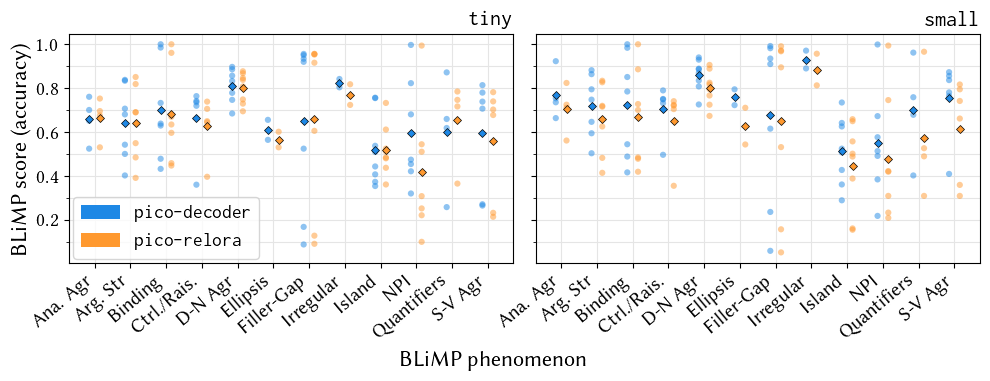

In [38]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))


labels = [r"\texttt{pico-decoder}", r"\texttt{pico-relora}"]

positions = []

ticks = np.arange(len(phenomena))

group_width = 0.9  # Total width for each group of boxes
box_width = 0.2
box_offset = 0.05
real_offset = (box_width / 2) + box_offset
positions = []

for i in ticks:
    positions.extend([i - real_offset, i + real_offset])

# Set colors for boxes
colors = ["#1E88E5", "#FF992F"]

titles = [r"\texttt{tiny}", r"\texttt{small}"]

for ax_idx, (ax, phen_data) in enumerate(zip(axs, phen_scale_data)):
    for idx, (phen, pos) in enumerate(zip(phen_data, positions)):
        jitter = np.zeros(len(phen))

        color = colors[idx % 2]

        ax.scatter(
            pos + jitter,
            phen,
            color=color,
            alpha=0.5,  # Transparency
            s=20,
            edgecolor="none",
            zorder=3,
        )

        ax.plot(
            pos,
            np.mean(phen),
            marker="D",
            markersize=4,
            markerfacecolor=color,
            markeredgecolor="black",
            markeredgewidth=0.5,
            zorder=6,
        )

    ax.set_xticks(
        ticks,
        labels=[shorten_label(lab).strip() for lab in phenomena],
        rotation=40,
        ha="right",
        rotation_mode="default",
    )

    ax.tick_params(axis="both", labelsize=TICK_LABEL_SIZE)

    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    # ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}"))
    ax.yaxis.set_minor_formatter(NullFormatter())

    ax.grid(which="both", axis="both", color="#E5E5E5")

    ax.set_title(titles[ax_idx], loc="right", fontsize=AXIS_LABEL_SIZE)

    if ax_idx == 0:
        legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, labels)]
        ax.set_ylabel("BLiMP score (accuracy)", fontdict={"size": AXIS_LABEL_SIZE})
        # Add the legend
        ax.legend(
            handles=legend_elements,
            loc="lower left",
            bbox_to_anchor=(0, 0),
            borderaxespad=0.2,
            fontsize=TICK_LABEL_SIZE,
        )

fig.supxlabel(r"BLiMP phenomenon", size=AXIS_LABEL_SIZE, y=0.06)

fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
fig.savefig("../graphs/blimp_phenom_strip.pdf")
fig.show()